In [40]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
import numpy as np
from nltk.corpus import stopwords
#nlp = spacy.load('es_core_news_lg')

In [41]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
text = """Solmicro ERP Stocks nos permite llevar el control de las existencias, para poder saber en cualquier momento: ¿Qué cantidad y qué valor tienen los artículos que tengo en los almacenes?.

En primer lugar debemos tener en cuenta que para gestionar nuestro stock deberemos tener cierta información registrada en el sistema:

Artículos: registrar el producto y configurar el uso de Stocks.
Almacenes: registrar nuestros almacenes con sus correspondientes ubicaciones (si trabajamos con almacenes compartimentalizados).
Tipos de Movimientos: indicamos qué clase de movimiento se realizan en los almacenes, si estamos sacando o metiendo material o bien tratando con un ajuste por Inventario que no necesariamente es entrada ni salida.
Los Criterios de Valoración y las Cuentas contables para la Valoración del almacén, los Inventarios y la Regularización de existencias. Es decir, la gestión de Stocks también nos permite obtener la información contable del cierre de inventario para su posterior envio y gestión en el área de Contabilidad del módulo Financiero.
Una vez registrada esta información podremos empezar a realizar los procesos de la gestión de Stocks.

Los procesos del circuito de Stocks se refieren a los procesos básicos de la gestión:

Realizar los Inventarios.
Controlar nuestros Almacenes.
Por un lado podremos realizar la entrada y salida de material. Este proceso se realiza durante los procesos de recepción en compras y expedición en ventas, o bien desde la fabricación, con el control de consumibles y materia prima, así como los productos terminados.
Generar movimientos que no se encuentren vinculados a ningun proceso gestionable. Realizar ajustes, transferencias, y llevar un histórico de todos los movimientos realizados.
Valorar los almacenes. Proceso con el que podremos saber siempre el valor de nuestros almacenes, tanto el valor actual como el valor de una fecha determinada. Igualmente podremos utilizar cualquiera de los criterios de valoración de almacén: FIFO, LIFO, Última Compra, Precio Estándar y Precio Medio.
Finalmente se realiza el Cierre del Inventario obteniendo la información contable para el posterior paso, la Regularización de Existencias en el módulo de contabilidad.
La Gestión de Stocks incorpora una serie de herramientas que nos permitirán trabajar mas a fondo con nuestro stock, podremos:

Planificar nuestros almacenes: podremos establecer cuándo realizar el aprovisionamiento de nuestros almacenes así como mantener el nivel de existencias para evitar o atender roturas de stock.
Utilizaremos para ello la gestión del Punto de Pedido, el Stock de Seguridad y el Lote Mínimo de Fabricación.
Gestión de Stock Negativo: que nos permitirá bien, evitar realizar expediciones cuando no tengamos material en stock, o bien, si llevamos un buen control de aprovisionamiento, podremos configurar nuestro sistema para que podamos realizar expediciones de material que aunque no tengamos existencias, sepamos que contaremos con el en una fecha determinada.
Gestión de nuestros artículos por Lotes.
Gestionar nuestros artículos con Números de Serie.
Gestionar la devolución de envases retornables.
Si trabajamos con más de una unidad de almacenamiento por artículo, podremos llevar una gestión de doble unidad.
Inventarios Permanentes.
Artículos Obsoletos.
Kits de Artículos.
Almacenes de Depósito (almacenes "de cliente").
Además de estos procesos, tendremos a nuestra disposición todas las estadísticas necesarias para poder consultar la disponibilidad y trazabilidad de las referencias durante la gestión del stock."""

In [43]:
#vamos a trabajar con spacy
nlp = spacy.load('es_core_news_lg')
#documento = 

In [44]:
doc = nlp(text)

In [45]:
entidades = [ents.text for ents in doc.sents]

In [46]:
print(entidades)

['Solmicro ERP Stocks nos permite llevar el control de las existencias, para poder saber en cualquier momento: ¿Qué cantidad y qué valor tienen los artículos que tengo en los almacenes?.\n\n', 'En primer lugar debemos tener en cuenta que para gestionar nuestro stock deberemos tener cierta información registrada en el sistema:\n\nArtículos: registrar el producto y configurar el uso de Stocks.\n', 'Almacenes: registrar nuestros almacenes con sus correspondientes ubicaciones (si trabajamos con almacenes compartimentalizados).\n', 'Tipos de Movimientos: indicamos qué clase de movimiento se realizan en los almacenes, si estamos sacando o metiendo material o bien tratando con un ajuste por Inventario que no necesariamente es entrada ni salida.\n', 'Los Criterios de Valoración y las Cuentas contables para la Valoración del almacén, los Inventarios y la Regularización de existencias.', 'Es decir, la gestión de Stocks también nos permite obtener la información contable del cierre de inventario 

In [47]:
import string

In [48]:
sentences_no_punct = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in entidades]

In [50]:
sentences_lower = [sentence.lower() for sentence in sentences_no_punct]

In [61]:
stopwords_sp = set(stopwords.words("spanish"))
sentences_no_stopwords = [sentence for sentence in sentences_lower if sentence not in stopwords_sp ]

In [62]:
print(sentences_no_stopwords)

['solmicro erp stocks nos permite llevar el control de las existencias para poder saber en cualquier momento ¿qué cantidad y qué valor tienen los artículos que tengo en los almacenes\n\n', 'en primer lugar debemos tener en cuenta que para gestionar nuestro stock deberemos tener cierta información registrada en el sistema\n\nartículos registrar el producto y configurar el uso de stocks\n', 'almacenes registrar nuestros almacenes con sus correspondientes ubicaciones si trabajamos con almacenes compartimentalizados\n', 'tipos de movimientos indicamos qué clase de movimiento se realizan en los almacenes si estamos sacando o metiendo material o bien tratando con un ajuste por inventario que no necesariamente es entrada ni salida\n', 'los criterios de valoración y las cuentas contables para la valoración del almacén los inventarios y la regularización de existencias', 'es decir la gestión de stocks también nos permite obtener la información contable del cierre de inventario para su posterior

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# sentences_no_stopwords es la lista de oraciones limpias y normalizadas

# Crear un objeto vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"))

# Calcular la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(sentences_no_stopwords)


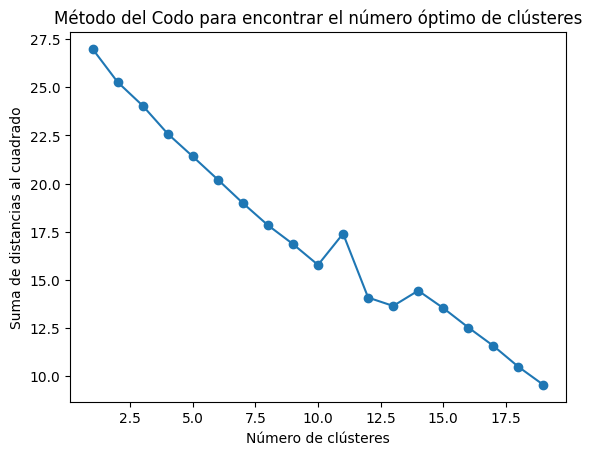

In [67]:
# tfidf_matrix es tu matriz TF-IDF

# Lista para almacenar los valores de suma de distancias
sum_of_squared_distances = []

# Probamos diferentes valores de k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    sum_of_squared_distances.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(range(1, 20), sum_of_squared_distances, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Método del Codo para encontrar el número óptimo de clústeres')
plt.show()